In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
from astropy.units import Unit
import sncosmo

/usr/local/manual/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [9]:
from OpSimSummary import summarize_opsim as so
from sqlalchemy import create_engine
import pandas as pd

In [10]:
dbname = '/Users/rbiswas/data/LSST/OpSimData/enigma_1189_sqlite.db'
#opsdb = db.OpsimDatabase(dbname)
#propID, propTags = opsdb.fetchPropInfo()
#DD = propTags['DD'][0]
#WFD = propTags['WFD'][0]
# Read in the OpSim DataBas

In [11]:
from lsst.sims.maf import db
from lsst.sims.maf.utils import opsimUtils

In [12]:
engine = create_engine('sqlite:///' + dbname)

In [16]:
EnigmaDeep_direct = pd.read_sql_query('SELECT * FROM SUMMARY WHERE PROPID is 366 and fieldId is 290', 
                                      engine, index_col='obsHistID')

In [17]:
summary = so.SummaryOpsim(EnigmaDeep_direct)

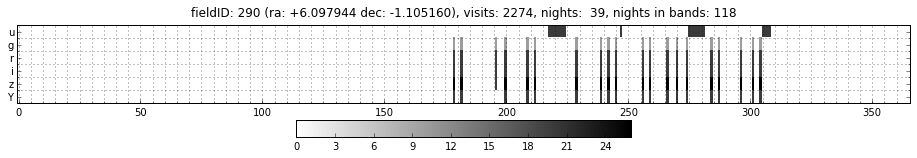

In [19]:
cadence_fig, cadence_mat = summary.cadence_plot(290)

In [20]:
summary.mjdvalfornight(250)

49603

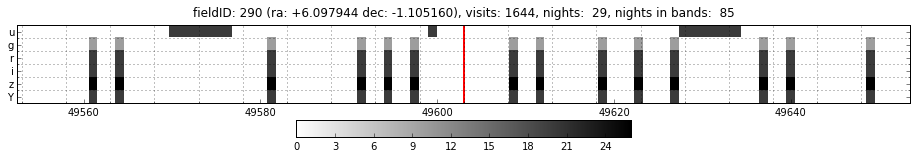

In [22]:
fig, mat = summary.cadence_plot(290, mjd_center=49603, mjd_range=[-50, 50])

In [45]:
x = EnigmaDeep_direct.query('night > 200 and night < 300').copy(deep=True)

In [46]:
x[['filter', 'expMJD']]

,filter,expMJD
obsHistID,,
165827,r,49561.251252
165828,r,49561.251681
165829,r,49561.252109
165830,r,49561.252526
165831,r,49561.252942
165832,r,49561.253371
165833,r,49561.253787
165834,r,49561.254204
165835,r,49561.254621


In [29]:
dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source='salt2-extended', effects=[dust, dust],
                               effect_names=['host', 'mw'],
                               effect_frames=['rest', 'obs'])

In [30]:
model.set(z=1.0, c=0., x1=0., t0=49603)
model.set_source_peakabsmag(-19.3, 'bessellb', 'ab')

In [31]:
print model

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 1.0
  phases     : [-20, .., 50] days
  wavelengths: [300, .., 18000] Angstroms
effect (name='host' frame='rest'):
  class           : CCM89Dust
  wavelength range: [909.09, 33333.3] Angstroms
effect (name='mw' frame='obs'):
  class           : CCM89Dust
  wavelength range: [909.09, 33333.3] Angstroms
parameters:
  z       = 1.0
  t0      = 49603.0
  x0      = 1.8469279661995543e-06
  x1      = 0.0
  c       = 0.0
  hostebv = 0.0
  hostr_v = 3.1000000000000001
  mwebv   = 0.0
  mwr_v   = 3.1000000000000001


In [32]:
import os
throughputsDir = os.getenv('THROUGHPUTSDIR')

In [33]:
bandPassList = ['u', 'g', 'r', 'i', 'z', 'y']
banddir = os.path.join(os.getenv('THROUGHPUTS_DIR'), 'baseline')
# lsstbands = list()
# lsstbp = dict()

for band in bandPassList:

    # setup sncosmo bandpasses
    bandfname = banddir + "/total_" + band + '.dat'


    # register the LSST bands to the SNCosmo registry
    # Not needed for LSST, but useful to compare independent codes
    # Usually the next two lines can be merged,
    # but there is an astropy bug currently which affects only OSX.
    numpyband = np.loadtxt(bandfname)
    sncosmoband = sncosmo.Bandpass(wave=numpyband[:, 0],
                                   trans=numpyband[:, 1],
                                   wave_unit=Unit('nm'),
                                   name='LSST_' + band)

    sncosmo.registry.register(sncosmoband, force=True)

In [9]:
times = np.arange(-20., 50., 1.)

In [41]:
times=x.expMJD.values
bands = x['filter'].apply(lambda x: 'LSST_' + x)

In [36]:
model.bandmag(time=times, band=bands, magsys='ab')

array([         nan,          nan,          nan, ...,  25.63858129,
        25.63860009,  25.63861889])

In [52]:
x['bandmag'] = model.bandmag(time=times, band=['LSST_g'], magsys='ab')

In [54]:
x[['expMJD', 'filter', 'bandmag']]

,expMJD,filter,bandmag
obsHistID,,,
165827,49561.251252,r,NaN
165828,49561.251681,r,NaN
165829,49561.252109,r,NaN
165830,49561.252526,r,NaN
165831,49561.252942,r,NaN
165832,49561.253371,r,NaN
165833,49561.253787,r,NaN
165834,49561.254204,r,NaN
165835,49561.254621,r,NaN


In [49]:
x[['expMJD', 'filter', 'bandmag']]

KeyError: "['bandmag'] not in index"

In [57]:
x[['expMJD', 'filter', 'bandmag']].to_csv('SN_opsim.csv', index_label='obsHistID')

In [10]:
model.bandmag(time=times, band=['LSST_g'], magsys='ab')

/Users/rbiswas/.local/lib/python2.7/site-packages/sncosmo-1.2.dev557-py2.7-macosx-10.5-x86_64.egg/sncosmo/models.py:168: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


array([ 29.06844337,  28.95961354,  28.85906057,  28.76724   ,
        28.69129056,  28.63663104,  28.58733723,  28.5304443 ,
        28.46709866,  28.39843729,  28.34424764,  28.32086074,
        28.32789466,  28.36757345,  28.41597571,  28.44576039,
        28.45244584,  28.43278098,  28.40947249,  28.40397383,
        28.41485815,  28.44144345,  28.48208217,  28.53541546,
        28.60724039,  28.70558224,  28.82204711,  28.94422637,
        29.07418024,  29.21485742,  29.36909981,  29.54098573,
        29.73464447,  29.95603378,  30.21548519,  30.53093278,
        30.92688653,  31.45192496,  32.28133743,  35.99510371,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [11]:
#band = ['LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'LSST_y'] 
#bands = band * len(times)
lcdict = dict()
lcdict['time'] = times
lcdict['u'] = model.bandmag(time=times.tolist() , band='LSST_u', magsys='ab')
lcdict['g'] = model.bandmag(time=times.tolist() , band='LSST_g', magsys='ab')
lcdict['r'] = model.bandmag(time=times.tolist() , band='LSST_r', magsys='ab')
lcdict['i'] = model.bandmag(time=times.tolist() , band='LSST_i', magsys='ab')
lcdict['z'] = model.bandmag(time=times.tolist() , band='LSST_z', magsys='ab')
lcdict['y'] = model.bandmag(time=times.tolist() , band='LSST_y', magsys='ab')

In [37]:
import pandas as pd
lc = pd.DataFrame(lcdict)

NameError: name 'lcdict' is not defined

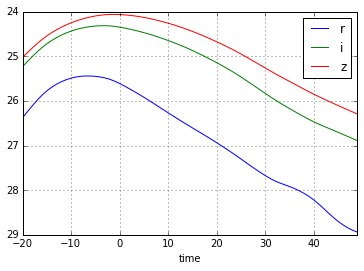

In [14]:
ax = .plot(x='time', y=['r', 'i', 'z'])
ax.invert_yaxis()

In [15]:
lc.to_csv('SN_z1.csv')